# ML_SP22_Project_3 (CNN)

### Due Date: 5/16 23:59 pm

In [1]:
import sys
import os
import platform 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from tensorflow import keras
from keras import layers
from tensorflow.keras.utils import image_dataset_from_directory
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Dense, Flatten, Input
from keras.models import Model
from keras.preprocessing import image

### The goal for this Project is to practice running CNN using a set of dog and cat image

***Make sure you fill in the blank inside the TODO section and try at least two different choices for the following parameters. Summarize your findings briefly at the end of the notebook***

1. Define a first model, try two epoch choices and two batch size.
2. Add dropout to the first model to see if it helps or not, pick one of the epoch and batch size you had before
3. Try a second model with slighly different model arhitecture
4. Summarize your findings

### Loading the datasets

In [3]:
# download the dogsvscats.zip, save it under your notebook directory
# or somewhere else, change base_dir to where you save the datasets
# sense I am using google colab, I first have to upload the data set to drive and copy the folder path from there

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
# Name of my data set path from drive

base_dir = "/content/drive/MyDrive/Colab Notebooks/dogsvscats"

In [5]:
#training the data set

train_dataset = image_dataset_from_directory(os.path.join(base_dir, "train"), image_size=(180, 180), batch_size=32)

Found 2010 files belonging to 2 classes.


In [6]:
# it seems that the batch size here is 32

validation_dataset = image_dataset_from_directory(os.path.join(base_dir, "validation"), image_size=(180, 180), batch_size=32)

Found 1010 files belonging to 2 classes.


In [7]:
# testing data set

test_dataset = image_dataset_from_directory(os.path.join(base_dir, "test"), image_size=(180, 180), batch_size=1000)

Found 1010 files belonging to 2 classes.


In [8]:
images, labels = list(train_dataset.take(1))[0]
class_names = train_dataset.class_names

Text(0.5, 1.0, 'cat')

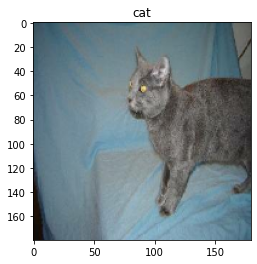

In [9]:
# imagine from the data set

idx = 20
plt.imshow(images[idx].numpy().astype("uint8"))
plt.title(class_names[labels[idx].numpy()])

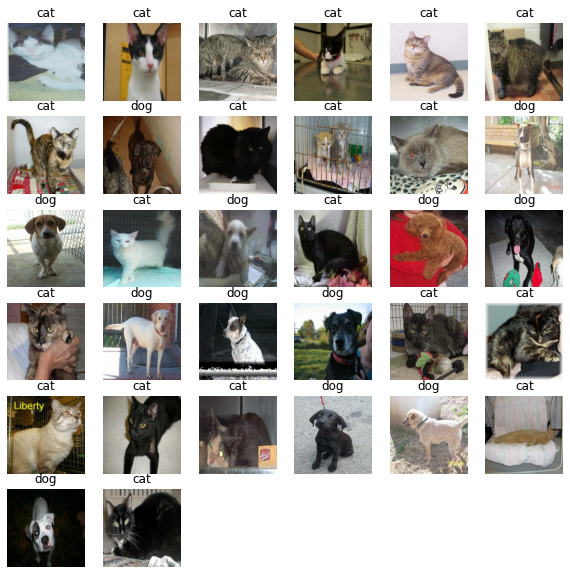

In [10]:
# Plotting the images

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(32):
    ax = plt.subplot(6, 6, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i].numpy()])
    plt.axis("off")

# showing the plotted image
plt.show()

### Define your first CNN model

In [11]:
# first model ith conv and maxpooling

# TODO: fill in the blank

inputs = keras.Input(shape=(180, 180, 3))
x = inputs

#x = layers.Rescaling(1./255)(inputs)
#x = layers.BatchNormalization()(x)

x = Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=128, kernel_size=3, activation="relu")(x)

#x = layers.Flatten()(x)
#outputs = layers.Dense(...)(x)

x = Flatten()(x)
outputs = Dense(1, activation="softmax")(x)

# model = keras.Model( ....)

model = Model(inputs=inputs, outputs=outputs)

### Comiple the model

In [12]:
# TODO: fill in the blank
# model.compile(loss="...crossentropy",

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# model.summary()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 128)       73856 

### Running the first model

In [14]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255
train_images.shape

(60000, 28, 28, 1)

In [ ]:
# Dont need batch size since batch size already defined to be 32

history = model.fit(train_dataset, epochs=20, validation_data=validation_dataset)

Epoch 1/20
63/63 [==============================] - 143s 2s/step - loss: 69.8655 - accuracy: 0.5557 - val_loss: 1.0214 - val_accuracy: 0.5792
Epoch 2/20
63/63 [==============================] - 141s 2s/step - loss: 6.3121 - accuracy: 0.5443 - val_loss: 4.5540 - val_accuracy: 0.5040
Epoch 3/20
63/63 [==============================] - 140s 2s/step - loss: 4.8773 - accuracy: 0.6209 - val_loss: 1.0997 - val_accuracy: 0.5772
Epoch 4/20
63/63 [==============================] - 138s 2s/step - loss: 2.6412 - accuracy: 0.7005 - val_loss: 1.1485 - val_accuracy: 0.5733
Epoch 5/20
63/63 [==============================] - 139s 2s/step - loss: 2.4025 - accuracy: 0.7896 - val_loss: 1.2710 - val_accuracy: 0.6040
Epoch 6/20
63/63 [==============================] - 140s 2s/step - loss: 0.7933 - accuracy: 0.8463 - val_loss: 1.8447 - val_accuracy: 0.6079
Epoch 7/20
63/63 [==============================] - 141s 2s/step - loss: 4.3453 - accuracy: 0.8841 - val_loss: 2.7121 - val_accuracy: 0.6198
Epoch 8/20
6

### Now, look at the testing dataset

In [ ]:
test_images, test_labels = list(test_dataset.take(1))[0]

In [ ]:
class_names

['cat', 'dog']

***Predict one image at a time***

Text(0.5, 1.0, 'cat')

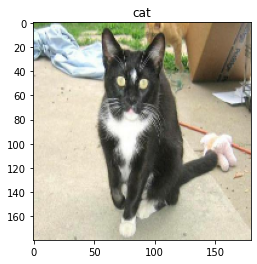

In [ ]:
idx = 50
plt.imshow(test_images[idx].numpy().astype("uint8"))
plt.title(class_names[test_labels[idx].numpy()])

In [ ]:
img = test_images[idx]
img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)

In [ ]:
print(img_array.shape)
print(img_batch.shape)

(180, 180, 3)
(1, 180, 180, 3)


In [ ]:
prediction = model.predict(img_batch)

In [ ]:
print(prediction)

[[4.433284e-13 1.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00]]


### Evaluate your first model out-of-sample

In [ ]:
# TODO fill-in the blank here

# I am expecting the accuracy to be pretty high

test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 15s 470ms/step - loss: 16.6791 - accuracy: 0.6000
Test accuracy: 0.600


##### The accuracy is 60 which is pretty low. Not what I was expecting.


### Try different choices of epoch, batch size for your first model

In [15]:
# Type your code here

# Batch size is now 500

train_dataset = image_dataset_from_directory(os.path.join(base_dir, "train"), image_size=(180, 180), batch_size=500)
validation_dataset = image_dataset_from_directory(os.path.join(base_dir, "validation"), image_size=(180, 180), batch_size=500)

Found 2010 files belonging to 2 classes.
Found 1010 files belonging to 2 classes.


In [16]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# model.summary()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 128)       73856 

In [17]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255
train_images.shape

(60000, 28, 28, 1)

##### Batch size is 500 and epochs is 10. I choose 10 just to save some times

In [ ]:
history = model.fit(train_dataset, epochs=10, validation_data=validation_dataset)

Epoch 1/10
5/5 [==============================] - 154s 27s/step - loss: 29.7869 - accuracy: 0.7189 - val_loss: 10.3949 - val_accuracy: 0.6099
Epoch 2/10
5/5 [==============================] - 142s 26s/step - loss: 0.0806 - accuracy: 0.9836 - val_loss: 10.4528 - val_accuracy: 0.6139
Epoch 3/10
5/5 [==============================] - 140s 26s/step - loss: 0.0251 - accuracy: 0.9925 - val_loss: 10.5187 - val_accuracy: 0.6149
Epoch 4/10
5/5 [==============================] - 139s 26s/step - loss: 0.0164 - accuracy: 0.9955 - val_loss: 10.6656 - val_accuracy: 0.6089
Epoch 5/10
5/5 [==============================] - 146s 27s/step - loss: 0.0106 - accuracy: 0.9970 - val_loss: 10.7081 - val_accuracy: 0.6188
Epoch 6/10
5/5 [==============================] - 145s 27s/step - loss: 0.0161 - accuracy: 0.9950 - val_loss: 10.8464 - val_accuracy: 0.6109
Epoch 7/10
5/5 [==============================] - 139s 26s/step - loss: 0.0117 - accuracy: 0.9965 - val_loss: 10.9020 - val_accuracy: 0.6139
Epoch 8/10
5

In [ ]:
test_images, test_labels = list(test_dataset.take(1))[0]

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 19s 603ms/step - loss: 11.6504 - accuracy: 0.6030
Test accuracy: 0.603


It seems that the accuracy is pretty similar to the other model. But consider this, the epoch and batch size for this model is 10 and 500. The other model had 20 epoch and 32 batch size.

### Add dropout to the first model to see if it helps or not, pick one of the epoch and batch size you had before

In [18]:
# I will add drop out to (batch size = 500 and epoch = 10) model and see if there is any differences

inputs = keras.Input(shape=(180, 180, 3))
x = inputs

#x = layers.Rescaling(1./255)(inputs)
#x = layers.BatchNormalization()(x)

x = Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=128, kernel_size=3, activation="relu")(x)

# adding dropout to be 0.20
x = Dropout(0.20)(x)

#x = layers.Flatten()(x)
#outputs = layers.Dense(...)(x)

x = Flatten()(x)

outputs = Dense(1, activation="softmax")(x)
# model = keras.Model( ....)

model = Model(inputs=inputs, outputs=outputs)

In [19]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255
train_images.shape

(60000, 28, 28, 1)

In [20]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# model.summary()
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 conv2d_3 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 41, 41, 128)       7385

In [ ]:
history = model.fit(train_dataset, epochs=10, validation_data=validation_dataset)

Epoch 1/10
5/5 [==============================] - 144s 27s/step - loss: 1213.6237 - accuracy: 0.4209 - val_loss: 191.3774 - val_accuracy: 0.5050
Epoch 2/10
5/5 [==============================] - 146s 27s/step - loss: 91.8843 - accuracy: 0.4985 - val_loss: 7.2549 - val_accuracy: 0.5446
Epoch 3/10
5/5 [==============================] - 143s 27s/step - loss: 34.9806 - accuracy: 0.5095 - val_loss: 12.1449 - val_accuracy: 0.4970
Epoch 4/10
5/5 [==============================] - 142s 27s/step - loss: 11.3964 - accuracy: 0.5453 - val_loss: 21.5535 - val_accuracy: 0.5059
Epoch 5/10
5/5 [==============================] - 152s 29s/step - loss: 15.4367 - accuracy: 0.5383 - val_loss: 5.6855 - val_accuracy: 0.4861
Epoch 6/10
5/5 [==============================] - 144s 27s/step - loss: 24.3752 - accuracy: 0.5065 - val_loss: 13.4361 - val_accuracy: 0.5059
Epoch 7/10
5/5 [==============================] - 142s 27s/step - loss: 12.8396 - accuracy: 0.5119 - val_loss: 10.7057 - val_accuracy: 0.5089
Epoch

In [ ]:
test_images, test_labels = list(test_dataset.take(1))[0]

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 17s 530ms/step - loss: 1.0260 - accuracy: 0.5730
Test accuracy: 0.573


The accuracy went down after adding the dropout. The accuracy went down by 3 points

### Try a second model with slightly different architecture (no need to be very complicated)

In [21]:
train_dataset = image_dataset_from_directory(os.path.join(base_dir, "train"), image_size=(180, 180), batch_size=32)

Found 2010 files belonging to 2 classes.


In [22]:
validation_dataset = image_dataset_from_directory(os.path.join(base_dir, "validation"), image_size=(180, 180), batch_size=32)

Found 1010 files belonging to 2 classes.


In [23]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255
train_images.shape

(60000, 28, 28, 1)

In [24]:
# I will now remove max polling and try again and see what happens

# Type your code here
inputs = keras.Input(shape=(180, 180, 3))
x = inputs

#x = layers.Rescaling(1./255)(inputs)
#x = layers.BatchNormalization()(x)

x = Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = Conv2D(filters=128, kernel_size=3, activation="relu")(x)

#x = layers.Flatten()(x)
#outputs = layers.Dense(...)(x)

x = Flatten()(x)
outputs = Dense(1, activation="softmax")(x)

# model = keras.Model( ....)

model = Model(inputs=inputs, outputs=outputs)

In [25]:
# TODO test your second model on out-of-sample data

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# model.summary()
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 conv2d_6 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 conv2d_7 (Conv2D)           (None, 176, 176, 64)      18496     
                                                                 
 conv2d_8 (Conv2D)           (None, 174, 174, 128)     73856     
                                                                 
 flatten_2 (Flatten)         (None, 3875328)           0         
                                                                 
 dense_2 (Dense)             (None, 5)                 19376645  
                                                                 
Total params: 19,469,893
Trainable params: 19,469,893
Non-t

In [ ]:
history = model.fit(train_dataset, epochs=5, validation_data=validation_dataset)

Epoch 1/5
63/63 [==============================] - 1140s 17s/step - loss: 615.8530 - accuracy: 0.5736 - val_loss: 6.6897 - val_accuracy: 0.5010
Epoch 2/5
63/63 [==============================] - 898s 14s/step - loss: 45.3120 - accuracy: 0.6169 - val_loss: 167.7289 - val_accuracy: 0.4950
Epoch 3/5
63/63 [==============================] - 901s 14s/step - loss: 5.6527 - accuracy: 0.7219 - val_loss: 3.1250 - val_accuracy: 0.5594
Epoch 4/5
63/63 [==============================] - 905s 14s/step - loss: 11.6520 - accuracy: 0.8428 - val_loss: 1.8171 - val_accuracy: 0.5525
Epoch 5/5
63/63 [==============================] - 905s 14s/step - loss: 7.6614 - accuracy: 0.8637 - val_loss: 5.7035 - val_accuracy: 0.5495


In [ ]:
test_images, test_labels = list(test_dataset.take(1))[0]

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 103s 3s/step - loss: 7.3041 - accuracy: 0.5410
Test accuracy: 0.541


### Summarize your findings below

In [ ]:
# Type your answers and comments here

In the first model where the batch size was 32 and epoch 20, I ran it couple of times and the result was alayws around 56 - 60. I feel that If I did more epoch then the accuracy would have increased more but running takes to much times.

After the first attempt, I then changed the batch size to 500 and set the epoch to 10. WIth this I was getting an accuracy around 60s. Even though the epoch is different in the second model, the batch size makes it up for the mission epoches.. 

When I added dropout to the second choice of first model, I got an accuracy of 57 which was suprising becuase I was expecting an higher accuracy. 

In the second model, I decided to remove the max pooling and see how the data behaves. The first thing I noticed was that it was taking very long for the model to run even though its running cycle is only 5 epoch. At first I put the epoch to 10, but after seeing the long execution time I changed it to 5. With this I got an accuracy of only 54. 